<a href="https://colab.research.google.com/github/amitesh197/Air_Quality_Index_Prediction_Model/blob/https%2Fgithub.com%2Famitesh197%2Fmaster/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
df.shape

(29531, 16)

In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


<Axes: >

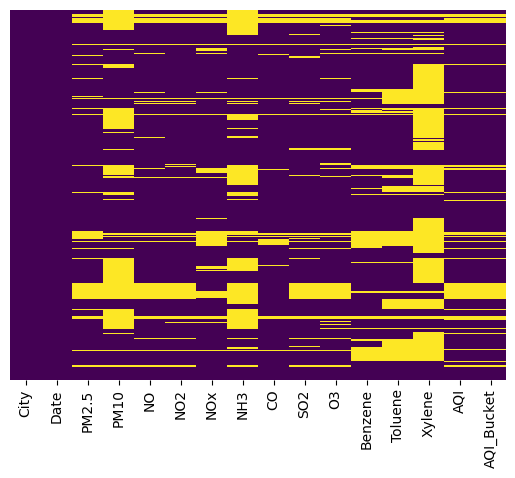

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

filling the Nan values present in the pollutants with mean (city wise)

In [9]:
df.iloc[:, 1:14] = df.groupby("City").transform(lambda x: x.fillna(x.mean()))
df

<ipython-input-9-71b4e09fe6a0>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.iloc[:, 1:14] = df.groupby("City").transform(lambda x: x.fillna(x.mean()))
<ipython-input-9-71b4e09fe6a0>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.iloc[:, 1:14] = df.groupby("City").transform(lambda x: x.fillna(x.mean()))
<ipython-input-9-71b4e09fe6a0>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:14] = df.g

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.000000,0.020000,0.000000,452.122939,NaN,NaN
1,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.680000,5.500000,3.770000,452.122939,NaN,NaN
2,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.800000,16.400000,2.250000,452.122939,NaN,NaN
3,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.430000,10.140000,1.000000,452.122939,NaN,NaN
4,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.010000,18.890000,2.780000,452.122939,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.000000,41.0,Good
29527,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.000000,70.0,Satisfactory
29528,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.000000,68.0,Satisfactory
29529,Visakhapatnam,16.640000,49.970000,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.000000,0.000000,0.000000,54.000000,54.0,Satisfactory


In [10]:
df.isnull().sum()

City              0
Date              0
PM2.5          2009
PM10              0
NO                0
NO2            1169
NOx            2009
NH3               0
CO                0
SO2             162
O3             2732
Benzene        4010
Toluene       13047
Xylene            0
AQI            4681
AQI_Bucket     4681
dtype: int64

In [11]:
df.iloc[:, 1:14]=df.fillna(df.mean())
df

<ipython-input-11-6a40c0c5266c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.iloc[:, 1:14]=df.fillna(df.mean())


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.000000,0.020000,0.000000,NaN,NaN
1,Ahmedabad,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.680000,5.500000,3.770000,NaN,NaN
2,Ahmedabad,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,6.800000,16.400000,2.250000,NaN,NaN
3,Ahmedabad,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,4.430000,10.140000,1.000000,NaN,NaN
4,Ahmedabad,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,7.010000,18.890000,2.780000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good
29527,Visakhapatnam,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory
29528,Visakhapatnam,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory
29529,Visakhapatnam,Visakhapatnam,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.000000,0.000000,0.000000,54.0,Satisfactory


In [12]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI           4681
AQI_Bucket    4681
dtype: int64

<Axes: >

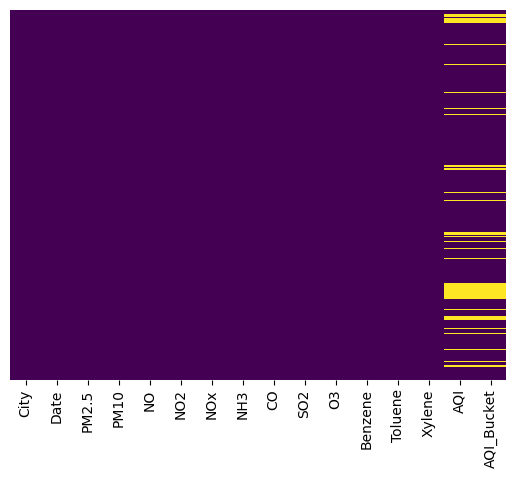

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3.
-->For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.

-->For CO and O3 the maximum value in last 8-hrs is used.

-->Each measure is converted into a Sub-Index based on pre-defined groups.

-->Sometimes measures are not available due to lack of measuring or lack of required data points.

-->Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

In [14]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))

In [15]:
# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))

In [17]:
# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

In [18]:
# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

In [19]:
# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

In [20]:
# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

In [21]:
# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

Filling the Nan values of AQI column by taking maximum values out of sub-Indexes

In [22]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))

In [23]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,Ahmedabad,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,...,0.000000,149.0,NaN,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
1,Ahmedabad,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,...,3.770000,123.0,NaN,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2,Ahmedabad,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,...,2.250000,300.0,NaN,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
3,Ahmedabad,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,...,1.000000,123.0,NaN,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
4,Ahmedabad,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,...,2.780000,329.0,NaN,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,...,0.730000,41.0,Good,50.000000,25.000000,10.00,23.75,3.00,0.000000,23.000000
29527,Visakhapatnam,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,...,0.380000,70.0,Satisfactory,74.000000,40.000000,15.00,20.00,2.75,0.000000,30.000000
29528,Visakhapatnam,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,...,0.000000,68.0,Satisfactory,65.000000,36.666667,10.00,22.50,2.50,0.000000,30.000000
29529,Visakhapatnam,Visakhapatnam,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,...,0.000000,54.0,Satisfactory,49.000000,26.666667,11.25,22.50,2.50,0.000000,28.000000


<Axes: >

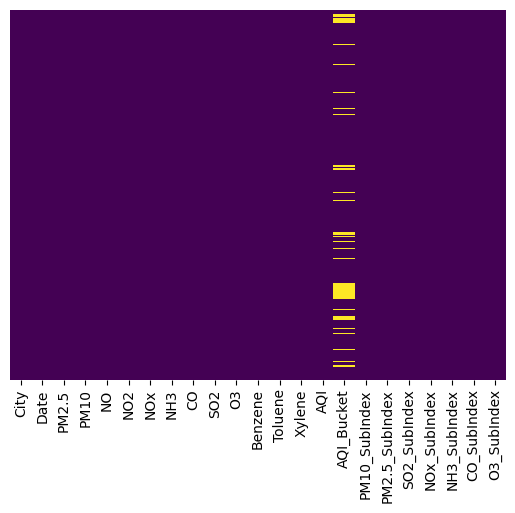

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

AQI Bucket

calculating AQI bucket and filling the NAN value present

In [25]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [26]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,Ahmedabad,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,...,0.000000,149.0,Moderate,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
1,Ahmedabad,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,...,3.770000,123.0,Moderate,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2,Ahmedabad,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,...,2.250000,300.0,Poor,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
3,Ahmedabad,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,...,1.000000,123.0,Moderate,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
4,Ahmedabad,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,...,2.780000,329.0,Very Poor,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,...,0.730000,41.0,Good,50.000000,25.000000,10.00,23.75,3.00,0.000000,23.000000
29527,Visakhapatnam,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,...,0.380000,70.0,Satisfactory,74.000000,40.000000,15.00,20.00,2.75,0.000000,30.000000
29528,Visakhapatnam,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,...,0.000000,68.0,Satisfactory,65.000000,36.666667,10.00,22.50,2.50,0.000000,30.000000
29529,Visakhapatnam,Visakhapatnam,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,...,0.000000,54.0,Satisfactory,49.000000,26.666667,11.25,22.50,2.50,0.000000,28.000000


<Axes: >

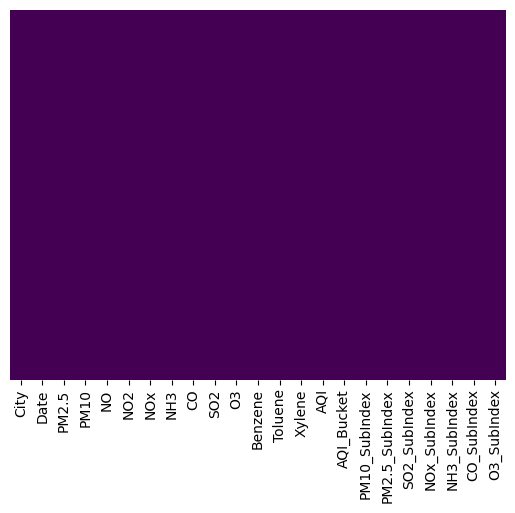

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'PM10_SubIndex', 'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex',
       'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

In [29]:
df_city_day = df.copy()
df_city_day.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'PM10_SubIndex', 'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex',
       'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

<ipython-input-30-e352f78d453b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot=True);


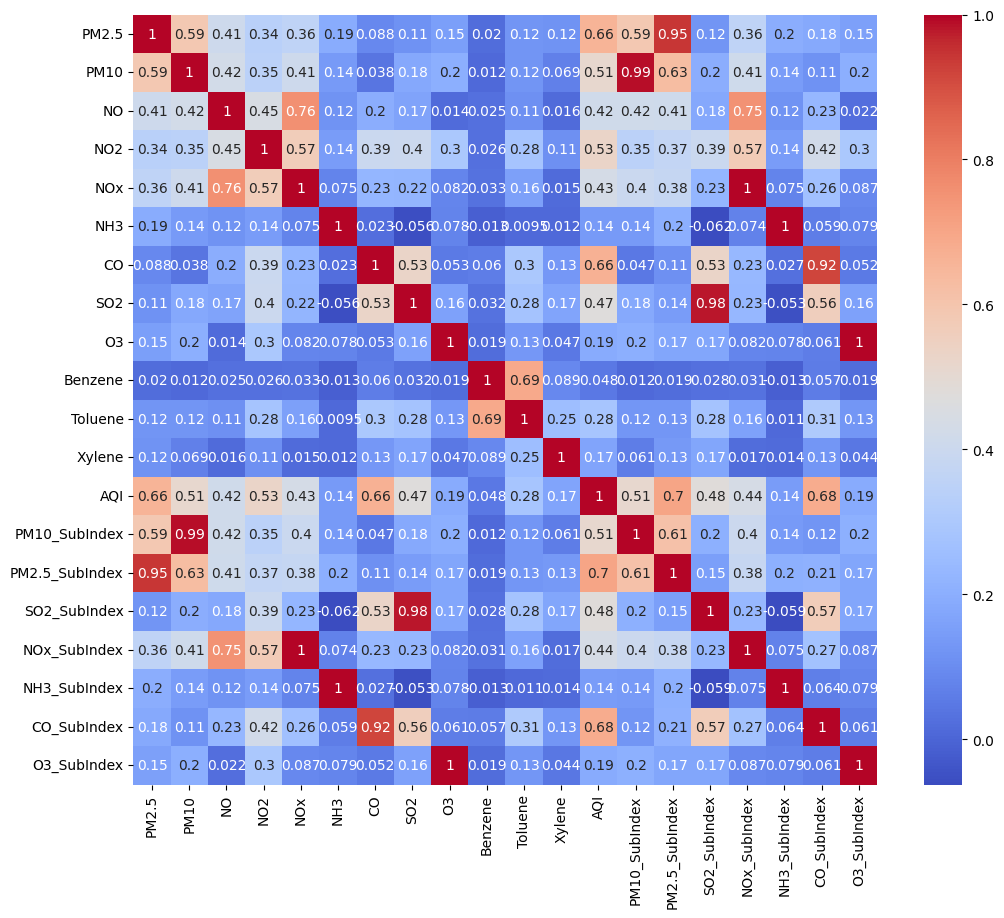

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

Distribution of different pollutants in last 5 years


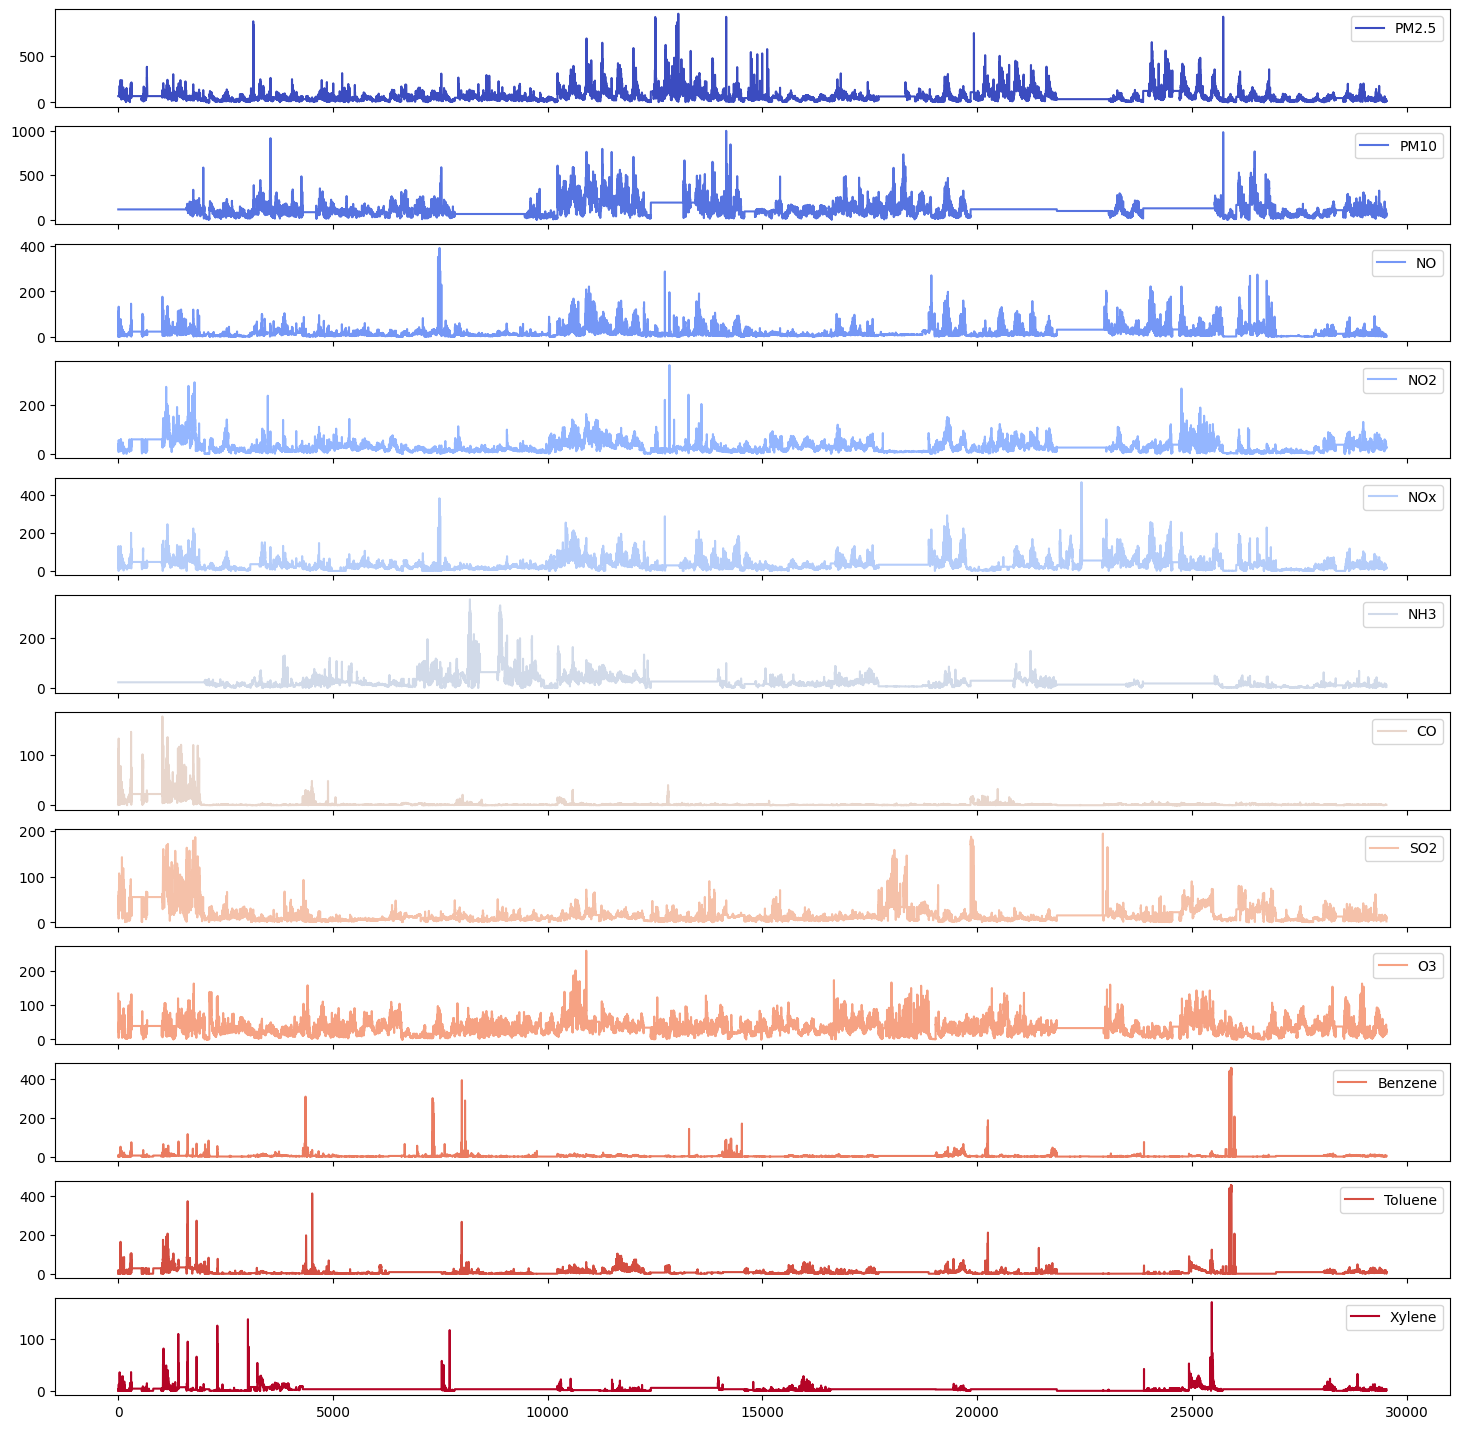

In [31]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
df_city_day = df_city_day[pollutants]

print('Distribution of different pollutants in last 5 years')
df_city_day.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);



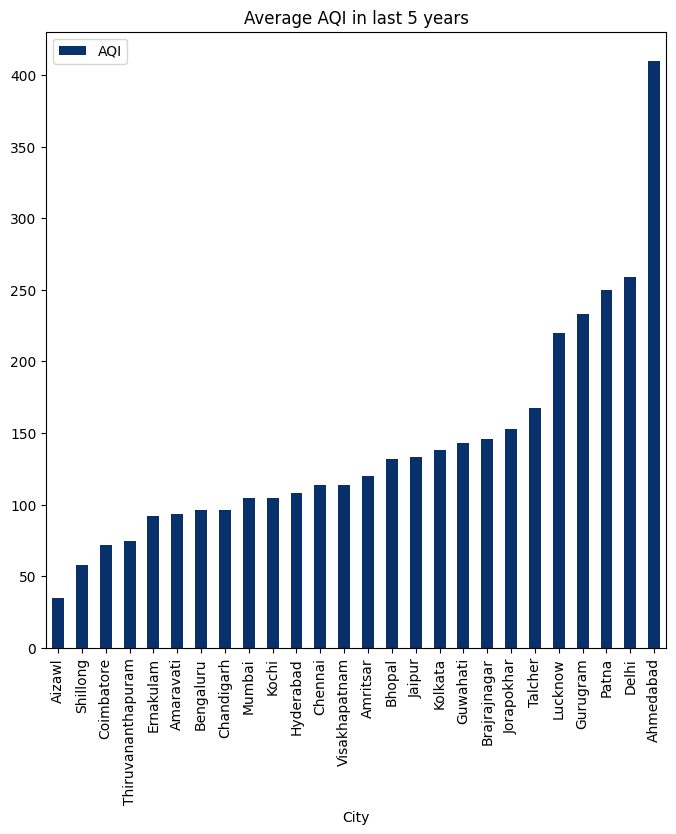

In [32]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

By above graph we can conclude that Ahmedabad is the heighest polluted city followed by Delhi and Gurugram

**LINEAR REGRESSION**

In [51]:
final_df= df[['AQI', 'AQI_Bucket']].copy()
final_df

,AQI,AQI_Bucket
0,149.0,Moderate
1,123.0,Moderate
2,300.0,Poor
3,123.0,Moderate
4,329.0,Very Poor
...,...,...
29526,41.0,Good
29527,70.0,Satisfactory
29528,68.0,Satisfactory
29529,54.0,Satisfactory


In [52]:
final_df['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [53]:
final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :0, 'Satisfactory' :1, 'Moderate' :2, 'Poor' :3, 'Very Poor' :4, 'Severe' :5}).astype(int) #mapping numbers
final_df.head()

,AQI,AQI_Bucket
0,149.0,2
1,123.0,2
2,300.0,3
3,123.0,2
4,329.0,4


In [66]:
X = df.iloc[:, 3:15]
y = final_df.iloc[:, :-1]

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [68]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [69]:
f'Coefficient of determination R^2 on train set {lin_reg.score(X_train, y_train)}'

'Coefficient of determination R^2 on train set 1.0'

In [70]:
f'Coefficient of determination R^2 on test set {lin_reg.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set 1.0'

In [71]:
lin_reg.coef_

array([[ 1.02140103e-15,  2.22044605e-16,  5.27355937e-16,
         2.49800181e-16, -6.93889390e-18, -7.46624984e-15,
        -2.08166817e-17,  3.46944695e-17, -2.34187669e-17,
         6.93889390e-17, -1.47885176e-16,  1.00000000e+00]])

In [72]:
lin_reg.intercept_

array([-6.82121026e-13])

In [73]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, y, cv = 3)

In [74]:
score.mean()

1.0

In [76]:
pd.DataFrame(lin_reg.coef_.T, X.columns, columns=['Coeff'])


,Coeff
PM10,1.021401e-15
NO,2.220446e-16
NO2,5.273559e-16
NOx,2.498002e-16
NH3,-6.938894e-18
CO,-7.466250e-15
SO2,-2.081668e-17
O3,3.469447e-17
Benzene,-2.341877e-17
Toluene,6.938894e-17


In [78]:
c = 0
for val in lin_reg.coef_:
    effect = 'increase' if val.any()>0 else 'decrease'
    print(f'Holding all other features fixed a 1 unit increase in {X.columns[c]} is associated with {effect} of {abs(val)} in AQI PM2.5')
    c = c+1


Holding all other features fixed a 1 unit increase in PM10 is associated with increase of [1.02140103e-15 2.22044605e-16 5.27355937e-16 2.49800181e-16
 6.93889390e-18 7.46624984e-15 2.08166817e-17 3.46944695e-17
 2.34187669e-17 6.93889390e-17 1.47885176e-16 1.00000000e+00] in AQI PM2.5


In [79]:
pred = lin_reg.predict(X_test)

<ipython-input-80-b012f2229a8d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - pred)


<Axes: ylabel='Density'>

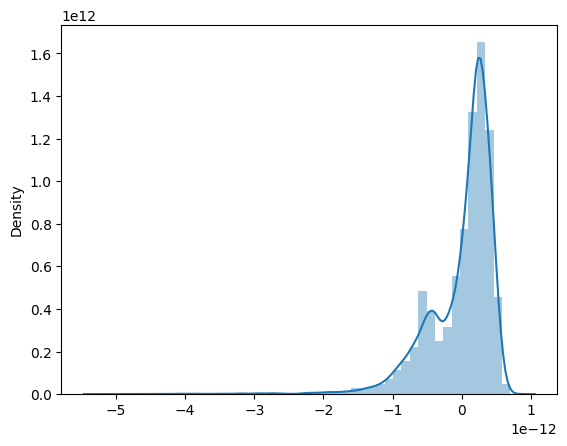

In [80]:
sns.distplot(y_test - pred)

In [81]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")
from sklearn.metrics import r2_score
print('R-square: {}'.format(r2_score(y_test, pred)))

Mean Abs Error: 3.5087177708052425e-13
Mean Sq Error: 2.3209846606505087e-25
Root Mean Error: 4.817659868287205e-13
R-square: 1.0


**RIDGE AND LASSO REGRESSION**

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

**RIDGE REGRESSION**

In [83]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_cv = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=3)
ridge_cv.fit(X,y)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [84]:
ridge_cv.best_params_

{'alpha': 1e-08}

In [85]:
ridge_cv.best_score_

-1.4289072072091931e-25

In [86]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")
from sklearn.metrics import r2_score
print('R-square: {}'.format(r2_score(y_test, pred)))


Mean Abs Error: 3.5087177708052425e-13
Mean Sq Error: 2.3209846606505087e-25
Root Mean Error: 4.817659868287205e-13
R-square: 1.0


**LASSO REGRESSION**

In [87]:
from sklearn.linear_model import Lasso
lasso = Lasso(tol=1)
# used tol = 1 since warning was given that convergence not taking place
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 50]}
lasso_cv = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=3)
lasso_cv.fit(X,y)

GridSearchCV(cv=3, estimator=Lasso(tol=1),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 50]},
             scoring='neg_mean_squared_error')

In [88]:
lasso_cv.best_params_

{'alpha': 20}

In [89]:
lasso_cv.best_score_

-2043.9012906097323

In [90]:
pred = lasso_cv.predict(X_test)

In [91]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")
from sklearn.metrics import r2_score
print('R-square: {}'.format(r2_score(y_test, pred)))

Mean Abs Error: 29.375850941323574
Mean Sq Error: 2375.9428733979726
Root Mean Error: 48.74364444107532
R-square: 0.8739911473351774


**DECISION TREE REGRESSOR**

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [93]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion='squared_error')
tree.fit(X_train, y_train)


DecisionTreeRegressor()

In [94]:
f'Coefficient of determination R^2 on train set {tree.score(X_train, y_train)}'

'Coefficient of determination R^2 on train set 1.0'

In [95]:
f'Coefficient of determination R^2 on test set {tree.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set 0.9996127943931233'

In [96]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree, X, y, cv = 3)

In [97]:
score.mean()

0.9913074838229875

**HYPERPARAMETER TUNING**

In [100]:
params = {
    'splitter': ['best', 'random'],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'min_samples_leaf': list(range(1,6)),
    'min_weight_fraction_leaf': [i/10 for i in range(1, 5)],
    'max_features': ['auto', 'log2', 'sqrt', None],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70]
}

In [101]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")
from sklearn.metrics import r2_score
print('R-square: {}'.format(r2_score(y_test, pred)))

Mean Abs Error: 29.375850941323574
Mean Sq Error: 2375.9428733979726
Root Mean Error: 48.74364444107532
R-square: 0.8739911473351774


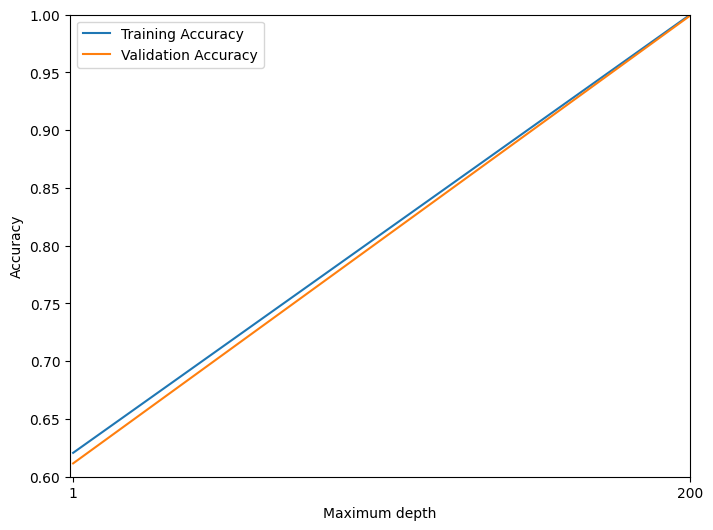

In [102]:
train_acc=[]
test_acc=[]
depth_list=(1, 200)
for d in depth_list:
  temp_tree=DecisionTreeRegressor(max_depth=d, random_state=1)
  temp_tree.fit(X_train, y_train)
  train_acc.append(temp_tree.score(X_train, y_train))
  test_acc.append(temp_tree.score(X_test, y_test))

plt.figure(figsize=([8, 6]))
plt.plot(depth_list, train_acc, label='Training Accuracy')
plt.plot(depth_list, test_acc, label='Validation Accuracy')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.xlim(0, 200)
plt.ylim(0.6, 1)
plt.xticks(depth_list)
plt.legend()
plt.show()

**RANDOM FOREST REGRESSION**

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [104]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

<ipython-input-104-6697b4b6a2f1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor()

In [105]:
f'Coefficient of determination R^2 on train set {forest.score(X_train, y_train)}'

'Coefficient of determination R^2 on train set 0.9999060416806759'

In [106]:
f'Coefficient of determination R^2 on test set {forest.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set 0.9997713377287568'

In [109]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(forest, X, y, cv = 3)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [110]:
score.mean()

0.9822641224618361

In [111]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")
from sklearn.metrics import r2_score
print('R-square: {}'.format(r2_score(y_test, pred)))

Mean Abs Error: 29.375850941323574
Mean Sq Error: 2375.9428733979726
Root Mean Error: 48.74364444107532
R-square: 0.8739911473351774


**XG BOOST REGRESSION**

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [113]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [114]:
f'Coefficient of determination R^2 on train set {xgb.score(X_train, y_train)}'

'Coefficient of determination R^2 on train set 0.9999943526218363'

In [115]:
f'Coefficient of determination R^2 on test set {xgb.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set 0.9997135100259418'

In [116]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X, y, cv = 3)

In [117]:
score.mean()

0.9835569459325252

In [118]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")
from sklearn.metrics import r2_score
print('R-square: {}'.format(r2_score(y_test, pred)))

Mean Abs Error: 29.375850941323574
Mean Sq Error: 2375.9428733979726
Root Mean Error: 48.74364444107532
R-square: 0.8739911473351774


**ADABOOST REGRESSION**

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [120]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.1)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error:  524.8124636837844


**PREDICTION**

In [121]:
final_df= df[['AQI', 'AQI_Bucket']].copy()
final_df

,AQI,AQI_Bucket
0,149.0,Moderate
1,123.0,Moderate
2,300.0,Poor
3,123.0,Moderate
4,329.0,Very Poor
...,...,...
29526,41.0,Good
29527,70.0,Satisfactory
29528,68.0,Satisfactory
29529,54.0,Satisfactory


In [122]:
final_df['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [123]:
final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :0, 'Satisfactory' :1, 'Moderate' :2, 'Poor' :3, 'Very Poor' :4, 'Severe' :5}).astype(int) #mapping numbers
final_df.head()

,AQI,AQI_Bucket
0,149.0,2
1,123.0,2
2,300.0,3
3,123.0,2
4,329.0,4


In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.iloc[:, 2:14]
y = final_df[['AQI']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

AQI = float(input("Enter the value of PM2.5: "))
AQI2 = float(input("Enter the value of PM10: "))
AQI3 = float(input("Enter the value of NO: "))
AQI4 = float(input("Enter the value of NO2: "))
AQI5 = float(input("Enter the value of NOx: "))
AQI6 = float(input("Enter the value of NH3: "))
AQI7 = float(input("Enter the value of CO: "))
AQI8 = float(input("Enter the value of SO2: "))
AQI9 = float(input("Enter the value of O3: "))
AQI10 = float(input("Enter the value of Benzene: "))
AQI11 = float(input("Enter the value of Toluene: "))
AQI12 = float(input("Enter the value of Xylene: "))

output = rf.predict([[AQI, AQI2, AQI3, AQI4, AQI5, AQI6, AQI7, AQI8, AQI9, AQI10, AQI11, AQI12]])

print("Predicted AQI:", output)
#0-->Good
#1-->Satisfactory
#2-->moderate
#3-->poor
#4-->Very poor
#5-->Severe


<ipython-input-126-4fdbd86eb9a9>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Enter the value of PM2.5: 123
Enter the value of PM10: 213
Enter the value of NO: 51
Enter the value of NO2: 38
Enter the value of NOx: 128
Enter the value of NH3: 76
Enter the value of CO: 17
Enter the value of SO2: 31
Enter the value of O3: 63
Enter the value of Benzene: 19
Enter the value of Toluene: 71
Enter the value of Xylene: 37
Predicted AQI: [629.88116842]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
